# Handwritten Digit Reconstruction

In the following notebook we will be reconstructing handwritten digits by training from the mnist dataset.

In [19]:
import pandas as pd
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


print("x_train shape: ", x_train.shape);
print("y_train shape: ", y_train.shape);
print("x_test shape: ", x_test.shape);
print("y_test shape: ", y_test.shape);


('x_train shape: ', (60000, 28, 28))
('y_train shape: ', (60000,))
('x_test shape: ', (10000, 28, 28))
('y_test shape: ', (10000,))


In [20]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print("x_train_scaled shape: ", x_train.shape);
print("x_test_scaled shape: ", x_test.shape);

('x_train_scaled shape: ', (60000, 784))
('x_test_scaled shape: ', (10000, 784))


## Training

In [21]:
from keras.models import Input
from keras.layers import Dense
from keras.models import Model

InputModel = Input(shape = (784,))
EncodedLayer = Dense(32, activation = 'relu')(InputModel)
DecodedLayer = Dense(784, activation = 'sigmoid')(EncodedLayer)
AutoencoderModel = Model(InputModel, DecodedLayer)

AutoencoderModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [22]:
AutoencoderModel.compile(optimizer='adadelta', loss='binary_crossentropy')

In [24]:
history = AutoencoderModel.fit(
    x_train, 
    x_train, 
    batch_size = 256, 
    epochs = 100, 
    shuffle = True, 
    validation_data = (x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.3656 - val_loss: 0.2712
Epoch 2/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2638 - val_loss: 0.2528
Epoch 3/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2430 - val_loss: 0.2309
Epoch 4/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2227 - val_loss: 0.2125
Epoch 5/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2072 - val_loss: 0.1996
Epoch 6/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.1963 - val_loss: 0.1903
Epoch 7/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.1879 - val_loss: 0.1828
Epoch 8/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.1810 - val_loss: 0.1765
Epoch 9/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.1750 - val_loss: 0.1

60000/60000 [==============================] - 1s 20us/step - loss: 0.0971 - val_loss: 0.0954
Epoch 78/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0970 - val_loss: 0.0954
Epoch 79/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0969 - val_loss: 0.0953
Epoch 80/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0968 - val_loss: 0.0952
Epoch 81/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0967 - val_loss: 0.0951
Epoch 82/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0967 - val_loss: 0.0951
Epoch 83/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0966 - val_loss: 0.0950
Epoch 84/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0965 - val_loss: 0.0949
Epoch 85/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0964 - val_loss: 0.0949
Epoch 86/100
60000/60000 [========================

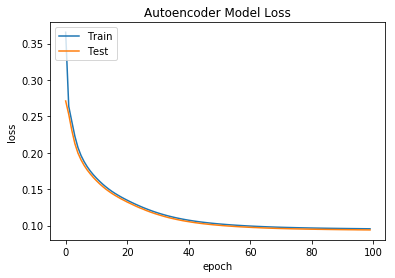

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Autoencoder Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["Train", "Test"], loc='upper left')
plt.show()

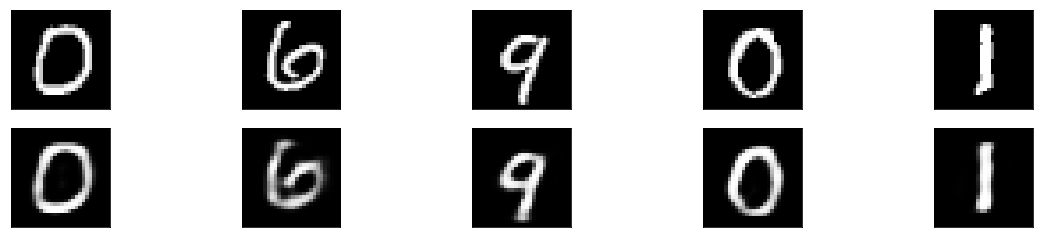

In [30]:
decodedDigits = AutoencoderModel.predict(x_test)
n = 5
plt.figure(figsize = (20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i + 10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodedDigits[i + 10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()